# North Carolina's Pick 3 Lottery: 1-Off or Sum-It-Up?

Almost every state offers a Pick 3 lottery game where three integers between 0 and 9, inclusive, are drawn consecutively.  A player can win in various ways such as choosing a three-digit number that is in the exact order or any order of the number drawn.  Pick 3's two newest games are *1-Off* and *Sum-It-Up* with more information on how to play on the [North Carolina Lottery website](https://www.nclottery.com/Pick3How).  The unique objective for winning both games is to **not** have the same digits as the number drawn.  In this project, we will use [Pick 3 Past Draws](https://www.nclottery.com/Pick3Past) data that covers almost the entire timeline of the Pick 3 lottery (Jun. 2007 - Jun. 2019) in CSV format and a list of randomly picked numbers to answer the following questions:

- Do the actual number of wins for the 1-Off and Sum-It-Up games outweigh the expected number of wins?
- Which month produces the most wins for each game?
- What is the average monthly gain or loss for each game?
- Which game is statistically more promising to win for someone who plays both drawings daily?
- What are some of the possible benefits of a player knowning the top 5 most drawn numbers **and** sums of the Pick 3 Lottery's lifetime?


## Introduction

Firstly, we need to read in the dataset and explore the columns to become familiar. 

In [1]:
# Import packages to read in and explore the data
import pandas as pd
import datetime
import numpy as np

pick_3 = pd.read_csv('NCELPick3.csv')

pick_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 7 columns):
Date           8597 non-null object
Day/Eve        8596 non-null object
Number 1       8596 non-null float64
Number 2       8596 non-null float64
Number 3       8596 non-null float64
GreenBall      144 non-null object
DoubleDraw*    150 non-null object
dtypes: float64(3), object(4)
memory usage: 470.2+ KB


## Removing Irrelevant Rows and Columns

Since we are only focusing on the 1-Off and Sum-It-Up games, the *GreenBall* and *DoubleDraw* colums can be removed.

In [2]:
# Use slicing to rename dataset, removing the last two columns
pick_3 = pick_3.loc[:,'Date':'Number 3']

pick_3.head(15) # Displays first 15 rows

,Date,Day/Eve,Number 1,Number 2,Number 3
0,06/08/2019,D,1.0,7.0,5.0
1,06/07/2019,D,0.0,3.0,8.0
2,06/07/2019,E,7.0,9.0,8.0
3,06/06/2019,D,4.0,9.0,9.0
4,06/06/2019,E,4.0,3.0,3.0
5,06/05/2019,D,6.0,0.0,2.0
6,06/05/2019,E,2.0,2.0,6.0
7,06/04/2019,D,7.0,4.0,5.0
8,06/04/2019,E,1.0,7.0,2.0
9,06/03/2019,D,1.0,8.0,8.0


After observing the first few rows, it is clear that each day is represented by day and evening drawings.  The focus of the project is on approximately the last 12 years shortly after Pick 3 Lottery began.  We need to cover June 6, 2007 to June 6, 2019.  Let's print the index of these rows and slice the data appropriately.

In [3]:
print(pick_3.loc[pick_3['Date']=='06/06/2019'].index)
print('\n')
print(pick_3.loc[pick_3['Date']=='06/06/2007'].index)

Int64Index([3, 4], dtype='int64')


Int64Index([8352], dtype='int64')


In [4]:
# Assign slice representing decade back to dataset

pick_3 = pick_3.loc[3:8352]

# Verify columns and that data covers Jun. 6, 2006 to Jun. 6, 2019
print(pick_3.info())
print('\n')
print(pick_3.iloc[0]) # Prints first row
print('\n')
print(pick_3.iloc[-1]) # Prints last row


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 3 to 8352
Data columns (total 5 columns):
Date        8350 non-null object
Day/Eve     8350 non-null object
Number 1    8350 non-null float64
Number 2    8350 non-null float64
Number 3    8350 non-null float64
dtypes: float64(3), object(2)
memory usage: 326.3+ KB
None


Date        06/06/2019
Day/Eve              D
Number 1             4
Number 2             9
Number 3             9
Name: 3, dtype: object


Date        06/06/2007
Day/Eve              E
Number 1             4
Number 2             7
Number 3             1
Name: 8352, dtype: object


## Renaming, Converting, and Creating Columns

Now that our data covers a span of 12 years, we need to proceed with the following steps:

1. Rename columns for simplicity.
2. Convert Date column to a datetime object.
3. Create a column of the Pick 3 draws as strings

In [5]:
pick_3.info()
new_cols = {'Date':'date', 'Day/Eve':'day_eve', 'Number 1':'num_1', 'Number 2':'num_2', 'Number 3':'num_3'}
pick_3.rename(columns=new_cols, inplace=True)
pick_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 3 to 8352
Data columns (total 5 columns):
Date        8350 non-null object
Day/Eve     8350 non-null object
Number 1    8350 non-null float64
Number 2    8350 non-null float64
Number 3    8350 non-null float64
dtypes: float64(3), object(2)
memory usage: 326.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 3 to 8352
Data columns (total 5 columns):
date       8350 non-null object
day_eve    8350 non-null object
num_1      8350 non-null float64
num_2      8350 non-null float64
num_3      8350 non-null float64
dtypes: float64(3), object(2)
memory usage: 326.3+ KB


All columns have now been revised and there are no null values for any column.  The **date** column is still assigned as an object type and must be converted to a datetime object.  


In [6]:
pick_3['date'] = pd.to_datetime(pick_3['date'])
print(pick_3.dtypes) # Verify that column has been converted to datetime
print('\n')
print(pick_3.head())

date       datetime64[ns]
day_eve            object
num_1             float64
num_2             float64
num_3             float64
dtype: object


        date day_eve  num_1  num_2  num_3
3 2019-06-06       D    4.0    9.0    9.0
4 2019-06-06       E    4.0    3.0    3.0
5 2019-06-05       D    6.0    0.0    2.0
6 2019-06-05       E    2.0    2.0    6.0
7 2019-06-04       D    7.0    4.0    5.0


The date column is in the proper format for analysis later in the project.  Since each digit drawn is in separte columns, it would be more efficient to display them as one number as a string.  Strings are the best way to represent each Pick 3 number simply because floats and integers do not easily support leading zeros. For all rows whose **num_1** and **num_2** columns contains a 0.0, this method is very beneficial.  Additionally, we need to modify the dataframe so that we only include the numbers drawn as one column instead of three.

In [7]:
# Combine the three columns to create a 3-digit string
pick_3['num_drawn'] = 100*pick_3['num_1'].astype(int) + 10*pick_3['num_2'].astype(int) + pick_3['num_3'].astype(int)
pick_3['num_drawn'] = pick_3['num_drawn'].astype(str)
pick_3.head()
print('\n')
print(pick_3[pick_3['num_1']==0.0].head())
print('\n')
print(pick_3[pick_3['num_2']==0.0].head())
# Use zfill method to convert include leading zeros

pick_3['num_drawn'] = pick_3['num_drawn'].str.zfill(3)
print(pick_3[pick_3['num_1']==0.0].head())
print('\n')
print(pick_3[pick_3['num_2']==0.0].head())
pick_3 = pick_3[['date', 'day_eve' ,'num_drawn']] # Slice dataframe and reassign
print('\n')
print(pick_3.info())



         date day_eve  num_1  num_2  num_3 num_drawn
10 2019-06-03       E    0.0    3.0    3.0        33
27 2019-05-25       D    0.0    2.0    2.0        22
34 2019-05-22       E    0.0    0.0    1.0         1
36 2019-05-21       E    0.0    0.0    9.0         9
37 2019-05-20       D    0.0    0.0    4.0         4


         date day_eve  num_1  num_2  num_3 num_drawn
5  2019-06-05       D    6.0    0.0    2.0       602
13 2019-06-01       D    7.0    0.0    5.0       705
24 2019-05-27       E    4.0    0.0    3.0       403
34 2019-05-22       E    0.0    0.0    1.0         1
36 2019-05-21       E    0.0    0.0    9.0         9
         date day_eve  num_1  num_2  num_3 num_drawn
10 2019-06-03       E    0.0    3.0    3.0       033
27 2019-05-25       D    0.0    2.0    2.0       022
34 2019-05-22       E    0.0    0.0    1.0       001
36 2019-05-21       E    0.0    0.0    9.0       009
37 2019-05-20       D    0.0    0.0    4.0       004


         date day_eve  num_1  num_2  num

## Creating Randomly Chosen Picks

A player can select the "Quick Pick" option if he or she wishes for the lottery ticket processor to randomly generate a Pick 3 number.  We will create a function that mimics this process and adds a column of the player's "Quick Pick" numbers for each drawing. 

In [8]:
def quick_pick(start, end, num):
    """Creates list of randomly selected integers and converts to strings"""
    import random
    picks = []
    
    for n in range(num):
        picks.append(str(random.randint(start,end)).zfill(3))
        
    return picks

g = quick_pick(0,999,8350)

pick_3 = pick_3.assign(quick_picks = g) # Add column to dataframe

print(pick_3.info())
print('\n')
print(pick_3.head())
print('\n')
print(pick_3.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8350 entries, 3 to 8352
Data columns (total 4 columns):
date           8350 non-null datetime64[ns]
day_eve        8350 non-null object
num_drawn      8350 non-null object
quick_picks    8350 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 261.0+ KB
None


        date day_eve num_drawn quick_picks
3 2019-06-06       D       499         620
4 2019-06-06       E       433         138
5 2019-06-05       D       602         818
6 2019-06-05       E       226         374
7 2019-06-04       D       745         146


           date day_eve num_drawn quick_picks
8348 2007-06-10       E       134         859
8349 2007-06-09       E       385         696
8350 2007-06-08       E       549         837
8351 2007-06-07       E       292         202
8352 2007-06-06       E       471         009


You'll notice the last 5 rows consist of only evening drawings.  This is due to the fact that day drawings were not introduced until approximately the year 2008.

## Displaying Results of the Pick 3

### 1-Off Game

We have a randomly picked number matching each drawing of the last decade and need to find a way to produce the result based on the rules of the 1-Off game.  The game requires that the corresponding digits for the player's number contain one number, two numbers, or all three numbers have an increase or decrease of 1.  For instance, if 123 is chosen for the evening drawing, a player can win by choosing 234 simply because all three digits were increased by 1 *in order*.  It is important to understand that 342 would not suffice as a winner because the first corresponding digits differ by 2, as well as the second digits. 

We can build a function that converts a string of numbers to a list of integers and a for loop that detects these differences in corresponding digits, respectively.  However, we hit a road block when it comes to the digits 0 and 9.  If we decrease 0 by 1, there is no way to represent -1 within a three-digit number.  Similarly, we cannot increase 9 by 1 because 10 cannot be presented without carrying over to the next place of digits.  Thankfully, the rules of the game ensure that decreasing 0 results to 9 and increasing 9 implies a 0.  Our function should perform the following actions:

- Convert each row of drawings and Quick Picks to lists of integers as the digits in order
- Compare the difference of each corresponding digit to a list of winning differences, including the special cases for 0 and 9
- Create a column displaying results for each row comparison


In [9]:
def str_convert(s):
    """This function converts string of numbers to list of integers."""
    
    return [int(s[0]), int(s[1]), int(s[2])]

f = lambda x: str_convert(x) 

one_off = []
for index, row in pick_3[["num_drawn","quick_picks"]].iterrows():
    # List of lists for winning differences, includes 0 and 9 exceptions for any corresponding digits 
    win_list = [[0,0,1], [0,1,1], [1,1,1], [0,0,9], [0,9,9], [0,1,9], [1,1,9], [1,9,9], [9,9,9]]
    
    win_num, qp_num = f(row['num_drawn']), f(row['quick_picks'])
    dig_diff = sorted([abs(win_num[0]-qp_num[0]), abs(win_num[1]-qp_num[1]), abs(win_num[2]-qp_num[2])])
    
    if dig_diff in win_list:
        one_off.append('W')
    
    else:
        one_off.append('L')
    
pick_3 = pick_3.assign(one_off = one_off)

# Print first 5 winning and losing rows
print(pick_3[pick_3['one_off']=='W'].head())
print('\n')
print(pick_3[pick_3['one_off']=='L'].head())

          date day_eve num_drawn quick_picks one_off
51  2019-05-13       D       616         505       W
146 2019-03-27       E       465         565       W
150 2019-03-25       E       431         341       W
228 2019-02-16       E       436         335       W
241 2019-02-10       E       682         593       W


        date day_eve num_drawn quick_picks one_off
3 2019-06-06       D       499         620       L
4 2019-06-06       E       433         138       L
5 2019-06-05       D       602         818       L
6 2019-06-05       E       226         374       L
7 2019-06-04       D       745         146       L


## Expected Number of Wins For 1-Off Game

Now that we've developed the tools to detect winners based on a player's Quick Pick for each drawing, we need to compare the number of **expected** wins to the number of **actual** wins.  The odds of winning the 1-Off game is 1 in 26. The formulas for expected and actual wins are:

- expected wins = (1/26) * (number of games played)
- actual wins = number of wins detected



In [10]:
exp_wins = (1/26)*(len(pick_3))
act_wins = len(pick_3[pick_3['one_off']=='W'])

print("The expected number of wins: {}".format(int(exp_wins)))       
print('\n')
print("The actual number of wins: {}".format(act_wins))

The expected number of wins: 321


The actual number of wins: 229


## 1-Off's Hottest Month

We can see that the number of actual wins **do not** outweigh the number of expected wins.  On the other hand, we can at least dive into the number of actual wins to see which month was the most successful for the player.  In this section, we'll determine the most winning month by:

- Separating the number of wins by month
- Organizing them into a dictionary

In [11]:
import datetime as dt

one_off_wins = pick_3[pick_3['one_off']=='W']
months = {}
for row in one_off_wins['date']:
    month = row.strftime("%m")
    
    if month in months:
        months[month] += 1
        
    else:
        months[month] = 1

print(months)

{'05': 21, '03': 19, '02': 20, '01': 24, '12': 17, '11': 20, '09': 21, '08': 11, '07': 21, '06': 19, '04': 16, '10': 20}


By observation, January came in as the hottest month with 24 wins for the 1-Off game over the 12 years.

## Finding Average Monthly Gain or Loss for 1-Off Game

The following is a chart for Prize Payout breakdown of the 1-Off game:

Type of Play (in dollars) | Match | Prize Payout (in dollars)
-------- |-------- |-------- 
0.50/1.00 | 1 digit | 20.00/40.00 
0.50/1.00 |2 digit | 5.00/10.00
0.50/1.00 |3 digit | 9.00/18.00

We will calculate the average monthly gain or loss per day based on the number of actual wins for the most common winning type of play (1-digit, 2-digit, or 3-digit).  Due to the late introduction of two daily drawings, the average will be better reflected by the total number of months for the 12-year span.

In [12]:
# Use for loop to separate winnings by number of digits off
digit_wins = []
for index, row in pick_3[['num_drawn','quick_picks','one_off']].iterrows():
    one_dig = [[0,0,1], [0,0,9]]
    two_dig = [[0,1,1], [0,1,9], [0,9,9]]
    three_dig = [[1,1,1], [1,1,9], [1,9,9], [9,9,9]]
    win, pick, result = f(row['num_drawn']), f(row['quick_picks']), row['one_off']
    dig_diff = sorted([abs(win[0]-pick[0]), abs(win[1]-pick[1]), abs(win[2]-pick[2])])
    
    if result == 'W':
        if dig_diff in one_dig:
            digit_wins.append("1-digit")
            
        elif dig_diff in two_dig:
            digit_wins.append("2-digit")
        
        elif dig_diff in three_dig:
            digit_wins.append("3-digit")
    
print("The number of 1-digit wins in the 1-Off game is: {}".format(digit_wins.count("1-digit")))
print("The number of 2-digit wins in the 1-Off game is: {}".format(digit_wins.count("2-digit")))
print("The number of 3-digit wins in the 1-Off game is: {}".format(digit_wins.count("3-digit")))

The number of 1-digit wins in the 1-Off game is: 52
The number of 2-digit wins in the 1-Off game is: 100
The number of 3-digit wins in the 1-Off game is: 77


The 2-digit wins are substantially more than the other two categories at 100, and the win margin is as great as 48.  Therefore, we will use the prize payout for 2-digit wins to calculate the average gain or loss for each month.  Assume the player participates in both drawings since there are only two years where only one daily drawing took place. 

In [13]:
# Use locale module to represent currency
import locale
locale.setlocale(locale.LC_ALL, '')

total_months = (12*13) # Multiply number of months in a year by the number of years

# Calculate money spent by player per month (30 days) using $0.50 plays
fifty_cent = 0.50 * 30 * 2

fifty_net_gain_or_loss = round(((102*5)/(total_months)) - fifty_cent, 2)

# The net gain or loss for $1.00 plays are just double
dollar_net_gain_or_loss = 2 * (fifty_net_gain_or_loss)

print(locale.currency(fifty_net_gain_or_loss))
print(locale.currency(dollar_net_gain_or_loss))

($26.73)
($53.46)


Both types of plays result in substantial average monthly losses for the last 12 years, which doesn't look good for a player's chances in winning the 1-Off game consistently.

## Sum-It-Up

The Sum-It-Up game offers an additional option to win based on matching the sum of the digits drawn in the Pick 3.  Once again, let's say that 123 is drawn.  Since the sum of the digits is 6, a player must have a number whose sum is 6 such as 204.  Now, we'll use the same Quick Picks and compare their sums to the Pick 3 drawings.  There are a few steps to detecting a winner for Sum-It-Up:

- Build a function that compares the sums of drawings to player's Quick Picks
- Create a column of wins and losses for further analysis

In [14]:
sum_it_up = []
for index, row in pick_3[["num_drawn","quick_picks"]].iterrows():
    win_sum, qp_sum = sum(f(row['num_drawn'])), sum(f(row['quick_picks']))
    
    if win_sum == qp_sum:
        sum_it_up.append('W')
        
    else:
        sum_it_up.append('L')

pick_3 = pick_3.assign(sum_it_up = sum_it_up)

# Verify winners and losers
print(pick_3[pick_3['sum_it_up']=='W'].head())
print('\n')
print(pick_3[pick_3['sum_it_up']=='L'].head())

         date day_eve num_drawn quick_picks one_off sum_it_up
12 2019-06-02       E       251         035       L         W
15 2019-05-31       D       245         731       L         W
28 2019-05-25       E       665         980       L         W
36 2019-05-21       E       009         117       L         W
38 2019-05-20       E       503         332       L         W


        date day_eve num_drawn quick_picks one_off sum_it_up
3 2019-06-06       D       499         620       L         L
4 2019-06-06       E       433         138       L         L
5 2019-06-05       D       602         818       L         L
6 2019-06-05       E       226         374       L         L
7 2019-06-04       D       745         146       L         L


## Expected Number of Wins For Sum-It-Up Game

Similar to the 1-Off game, we need to compare the number of **expected** wins to the number of **actual** wins.  The odds of winning the Sum-It-Up game is 1 in 28. The formulas for expected and actual wins are:

- expected wins = (1/28) * (number of games played)
- actual wins = number of wins detected

In [15]:
sum_exp = (1/28) * len(pick_3)
sum_act = len(pick_3[pick_3['sum_it_up']=='W'])

print("The expected number of wins: {}".format(int(sum_exp)))       
print("The actual number of wins: {}".format(sum_act))

The expected number of wins: 298
The actual number of wins: 477


## Sum-It-Up's Hottest Month

The actual number of wins **greatly** outweigh the expected number of wins in this case.  We'll also determine the months with the most wins:

- Separating the number of wins by month
- Organizing them into a dictionary

In [16]:
sum_wins = pick_3[pick_3['sum_it_up']=='W']
sum_months = {}
for row in sum_wins['date']:
    month = row.strftime("%m")
    
    if month in sum_months:
        sum_months[month] += 1
        
    else:
        sum_months[month] = 1

print(sum_months)

{'06': 32, '05': 56, '04': 36, '03': 46, '02': 50, '01': 43, '12': 34, '11': 32, '10': 37, '09': 31, '08': 44, '07': 36}


May tops all other months with 56 Sum-It-Up wins.

## Finding Average Monthly Gain or Loss for Sum-It-Up Game

We will calculate the average monthly gain or loss here for Sum-It-Up, much like our computations for the 1-Off game.  There are 11 payouts for the possible winning sums.  This can be rectified by doing the following:

- Create a for loop that populates a list of the winning picks for Sum-It-Up
- Calculate and display the mode of the list

In [17]:
#Import statistics module to use mode
import statistics as st

win_sums = []
for index, row in sum_wins.iterrows():
    
    pick_3_sum = sum(f(row['quick_picks']))
    win_sums.append(pick_3_sum)
    
most_com_sum = st.mode(win_sums)
com_sum_count = win_sums.count(most_com_sum)

message = "The most common winning sum for the player is {0} and accounts for {1} out of {2} wins."
print(message.format(most_com_sum, com_sum_count, sum_act))

The most common winning sum for the player is 11 and accounts for 55 out of 477 wins.


In [18]:
# Prize payout for $0.50 play on Sum 14 is $3.00

fifty_sum_net = round(((454*3)/(total_months)) - fifty_cent, 2)

# The net gain or loss for $1.00 plays are just double
dollar_sum_nut = 2 * (fifty_sum_net)

print(locale.currency(fifty_sum_net))
print(locale.currency(dollar_sum_nut))

($21.27)
($42.54)


## 1-Off or Sum-It-Up: Which is Better?

Based on the number of wins relative to total drawings, Sum-It-Up provides a player better odds of winning than 1-Off.  Furthermore, the player saves *more* money monthly on average playing the Sum-It-Up games even though the odds of winning is *less* than the 1-Off game.

## Top 10 Exact Picks and Sums

With both types of games ending with average losses per month for a player based on Quick Picks, it may be beneficial to take note of the most common Pick 3 numbers and sums.  If we select the top 10 picks and view number of occurrences for all sums from over 8,300 drawings, we will get a more clear direction on likely winning numbers for the 1-Off and Sum-It-Up games. This will be demonstrated by the following procedure:

1. Aggregate the Pick 3 numbers and Sum-It-Up columns to extract top 10 picks and all sums
2. Display the results as horizontal bar graphs

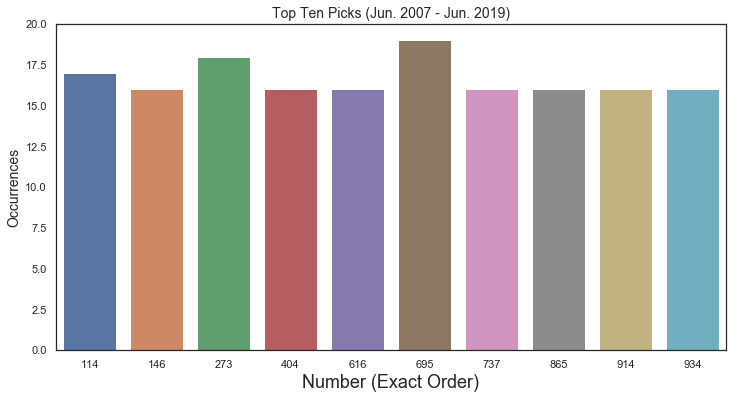

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

top_ten = pick_3['num_drawn'].value_counts().head(10)
sns.set_style('white')
plt.figure(figsize=(12,6))
sns.barplot(x=top_ten.index, y=top_ten.values)
plt.xlabel('Number (Exact Order)', fontsize=18)
plt.ylabel('Occurrences', fontsize=14)
plt.ylim((0,20))
plt.title('Top Ten Picks (Jun. 2007 - Jun. 2019)',fontsize=14)
plt.show()

Most of the top ten Pick 3 numbers drawing over the 12 years have about the same number of occurrences, with the exception of **114**, **273**, and **695** in ascending order.  

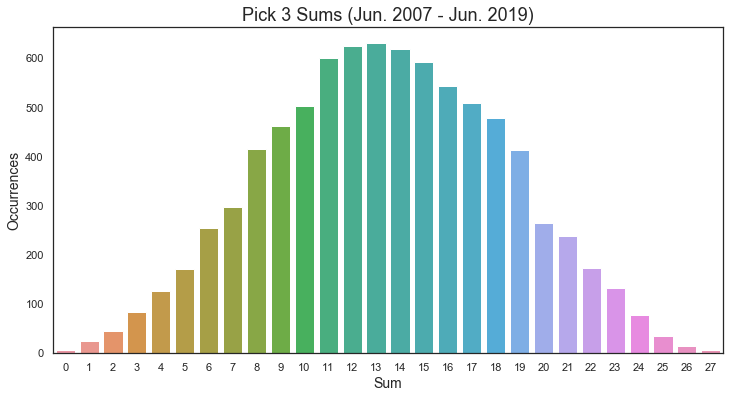

In [64]:
sums = {}
for index,row in pick_3.iterrows():
    pick_sum = sum(f(row['num_drawn']))
    if pick_sum in sums:
        sums[pick_sum] += 1
    else:
        sums[pick_sum] = 1

descend_sums = sorted(sums.items(), key = lambda x:(x[1],x[0]), reverse=True)# Sort dictionary by descending value
x_sum = []
y_sum = []
for n in descend_sums:
    x_sum.append(n[0])
    y_sum.append(n[1])
    
plt.figure(figsize=(12,6))
sns.barplot(x=x_sum, y=y_sum)
plt.xlabel('Sum', fontsize=14)
plt.ylabel('Occurrences', fontsize=14)
plt.title('Pick 3 Sums (Jun. 2007 - Jun. 2019)',fontsize=18)
plt.show()

## Conclusion

If a player wants to increase the chances of winning for the Pick 3 1-Off game, variations of 695, 273, and 114 should be considered when playing.  For example, I could choose several 1-Off orientations of 695 by playing 704 (2-digits) or 795 (1-digit).  Additionally, any 3 digits whose sum is 13 could be a hit winner for those interested in the Sum-It-Up games such as 940.  With 28 sums to choose from, the bar graph resembles a histogram and shows that sums between 8 and 19 dominate in occurrences, with 12, 13 and 14 in the top 3.  

Although the expected number of wins for 1-Off is more than that of Sum-It-Up, there are about twice as many opportunities to win with popular Sum-It-Up sums.  Thus, Sum-It-Up proves to be the game a player is more likely to win on a consistent basis.